**Project : Analyzing the trends of COVID-19 with Python**

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv('/content/covid_19_clean_complete (14).csv')

In [7]:
# Prepare the data
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').sum().reset_index()

In [8]:
# Prepare the data for Prophet
df_prophet = df[['Date', 'Confirmed', 'Recovered']]
df_prophet.columns = ['ds', 'y', 'add']

In [9]:
# Visualize the trend of infection rate
fig_infection = px.line(df, x='Date', y='Confirmed', title='COVID-19 Infection Trend')
fig_infection.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [10]:
# Visualize the trend of recovery rate
fig_recovery = px.line(df, x='Date', y='Recovered', title='COVID-19 Recovery Trend')
fig_recovery.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [17]:
from prophet import Prophet


In [18]:
model=Prophet(interval_width=0.95)

In [19]:
model

In [20]:
# Model the time series for prediction
model = Prophet()
model.fit(df_prophet[['ds', 'y']])


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ws0shiy/vox_jo06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ws0shiy/8wja7cod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91602', 'data', 'file=/tmp/tmp3ws0shiy/vox_jo06.json', 'init=/tmp/tmp3ws0shiy/8wja7cod.json', 'output', 'file=/tmp/tmp3ws0shiy/prophet_model2n0_p20e/prophet_model-20240807103107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:31:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:31:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
# Make future dataframe for predictions
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)


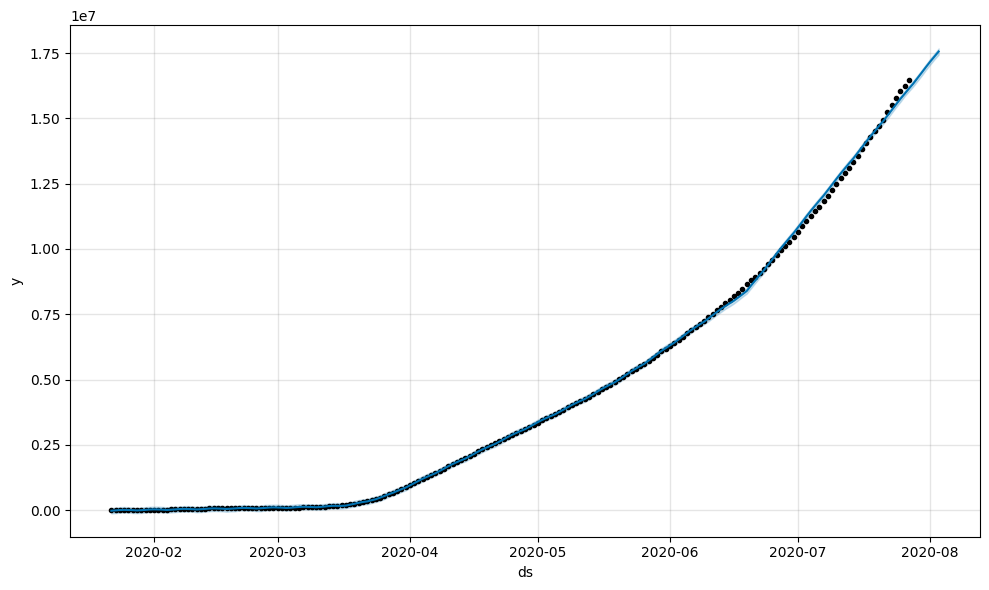

In [23]:
# Visualize the prediction
fig_forecast = model.plot(forecast)
fig_forecast.show()